In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pickle as pkl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, f1_score

import xgboost as xgb

from imblearn.over_sampling import SMOTE

sns.set_style('darkgrid')
cmap = sns.cm.mako_r

%matplotlib inline

In [2]:
data = pd.read_csv('./data/heart.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


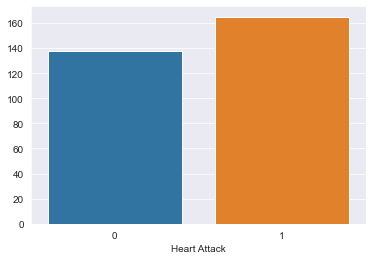

In [5]:
xaxis = data['target'].value_counts().index
yaxis = data['target'].value_counts().values

graph = sns.barplot(xaxis, yaxis)
graph.set_xlabel('Heart Attack')
plt.show()

In [6]:
X = data.drop(columns=['target'])
y = data['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(scaled_X, columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])

scaled_X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


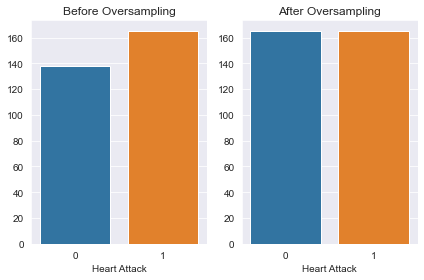

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Heart Attack')

sm = SMOTE(random_state = 2) 
scaled_X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Heart Attack')

plt.tight_layout()
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

In [10]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)
print(clf_svm.score(X_test, y_test))

0.8383838383838383


In [11]:
clf_knb = KNeighborsClassifier()
clf_knb.fit(X_train, y_train)
print(clf_knb.score(X_test, y_test))

0.6464646464646465


In [12]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
print(clf_svm.score(X_test, y_test))

0.6363636363636364


In [13]:
clf_rfc = RandomForestClassifier(n_estimators=10)
clf_rfc.fit(X_train, y_train)
print(clf_rfc.score(X_test, y_test))

0.7373737373737373


In [14]:
parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf_svm1 = GridSearchCV(svc, parameters, cv=5)
clf_svm1.fit(X_train, y_train)

print(clf_svm1.score(X_test, y_test))

0.8383838383838383


In [15]:
f1_score(y_test, clf_svm1.predict(X_test), average=None, labels=[1, 0])

array([0.85454545, 0.81818182])

In [16]:
clf_xgb = xgb.XGBRegressor(objective="binary:logistic", colsample_bytree = 0.3, learning_rate = 0.09, n_estimators=100, max_depth = 5)

clf_xgb.fit(X_train, y_train)

print(clf_xgb.score(X_test, y_test))

[11:47:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4896136838064147


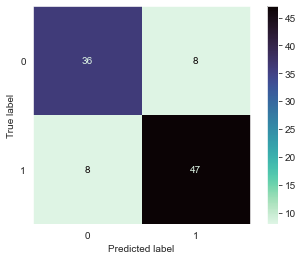

In [17]:
plot_confusion_matrix(clf_svm1, X_test, y_test, cmap=cmap)
plt.grid(False)
plt.show()

In [19]:
import pickle as pkl

with open('./models/heart_disease_classifier.pkl', 'wb') as f:
    pkl.dump(clf_svm1, f)

In [20]:
with open('./models/heart_disease_classifier.pkl', 'rb') as f:
    loaded_clf = pkl.load(f)